The accuracy score for linear as kernal function is  0.4
The value of Support vector for this case is 673
The accuracy score for rbf as kernal function is  0.428
The value of Support vector for this case is 640
The accuracy score for poly as kernal function is  0.416
The value of Support vector for this case is 662


Text(0, 0.5, 'Accuracy %age')

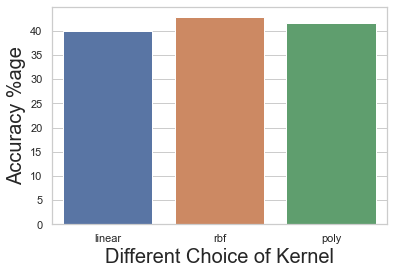

In [15]:
import imageio
import collections
from glob import glob
from scipy.io import wavfile
from sklearn.preprocessing import StandardScaler
import soundfile as sf
from sklearn.decomposition import PCA
from numpy.linalg import norm
import scipy.stats as sp
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
import numpy as np
import math
import os
import path
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
unique_word=[]
document_no=0
no_of_train=750
no_of_test=250
file_path="moviereviews.txt"
with open(file_path,'r') as file:
    for line in file:
        for word in line.split():
            if word=="1" or word=="0" or word=="-":
                continue
            else:
                if word.lower() not in unique_word:
                    unique_word.append(word.lower())
        document_no+=1

tf_train=np.zeros((len(unique_word),no_of_train))
tf_test=np.zeros((len(unique_word),no_of_test))
col=0
pos=0
with open(file_path,'r') as file:          #Spiliting and calculating TF for train and test data 
        for line in file:
            if col<750:
                for word in line.split():
                    if word=="1" or word=="0" or word=="-":
                        continue
                    else:
                        j=unique_word.index(word.lower())
                        tf_train[j][col]+=1
            else:
                for word in line.split():
                    if word=="1" or word=="0" or word=="-":
                        continue
                    else:
                        k=unique_word.index(word.lower())
                        tf_test[k][pos]+=1
                pos=pos+1
            col=col+1   
train_label=np.zeros((no_of_train)) 
test_label=np.zeros((no_of_test))
split=0
count1=0
count0=0
t=0
with open(file_path,'r') as file:
    for line in file:
        if split<750:
            if line[-2]=="1":
                train_label[split]=1
                count1=count1+1
            else:
                train_label[split]=0
                count0=count0+1
        else:
            if line[-2]=="1":
                test_label[t]=1
                count1=count1+1
            else:
                test_label[t]=0
                count0=count0+1
            t=t+1  
        split=split+1
for num in range(tf_train.shape[1]):
    tf_train[:,num]=tf_train[:,num]/np.sum(tf_train[:,num])
IDF_train=np.zeros((tf_train.shape[0]))   
for i in range(tf_train.shape[0]):
    for j in range(tf_train.shape[1]):
        if tf_train[i][j]!=0:
            IDF_train[i]+=1
for i in range(IDF_train.shape[0]):
    if IDF_train[i]!=0:
        IDF_train[i]=np.log((no_of_train/(IDF_train[i])))
    else:
        IDF_train[i]=0
TF_IDF_train=np.zeros((tf_train.shape)) 
for i in range(tf_train.shape[0]):
    for j in range(tf_train.shape[1]):
        TF_IDF_train[i][j]=tf_train[i][j]*IDF_train[i] 
scaler=StandardScaler()
scaler.fit(TF_IDF_train.T)
scaled_data=scaler.transform(TF_IDF_train.T) 
pca=PCA(n_components=10)
pca.fit(scaled_data)
reduced=pca.transform(scaled_data)
X_train=reduced.T    

for num in range(tf_test.shape[1]):
    tf_test[:,num]=tf_test[:,num]/np.sum(tf_test[:,num])
TF_IDF_test=np.zeros((tf_test.shape))                   #Using Train Data IDF for the test data
for i in range(tf_test.shape[0]):
    for j in range(tf_test.shape[1]):
        TF_IDF_test[i][j]=tf_test[i][j]*IDF_train[i]
       
scaled_data_test=scaler.transform(TF_IDF_test.T)
X_Test=pca.transform(scaled_data_test)       
kernal=["linear","rbf","poly"]

compare=[]
for i in kernal:
    model=SVC(kernel=i,C=1000,tol=0.00001)
    model.fit(X_train.T,train_label)
    predictions=model.predict(X_Test)
    print("The accuracy score for {} as kernal function is ".format(i),accuracy_score(test_label,predictions))
    print("The value of Support vector for this case is",model.support_vectors_.shape[0])
    compare.append(accuracy_score(test_label,predictions))
value=np.array(compare)*100
Y=["linear","rbf","poly"]
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=Y, y=value)
# # #Set label for x-axis
ax.set_xlabel( "Different Choice of Kernel" , size = 20 )
 
# # #Set label for y-axis
ax.set_ylabel( "Accuracy %age" , size = 20)
        